# Import Libraries

In [1]:
from transformers.auto_correlation import AutocorrelationTransformer
from transformers.seasonality import SeasonalityFeaturesTransformer
from transformers.interpolation import InterpolationTransformer
from transformers.trend import TrendTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from transformers.outlier import OutlierTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
from keras.models import Sequential
from xgboost import XGBRegressor
from keras.layers import Dense, LSTM
from sklearn.svm import SVR
from typing import List
from glob import glob
import pandas as pd
import numpy as np
import pickle

import warnings

warnings.filterwarnings("ignore")

2023-11-13 00:12:18.137615: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-13 00:12:18.179879: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-13 00:12:18.179940: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-13 00:12:18.179983: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-13 00:12:18.190208: I tensorflow/core/platform/cpu_feature_g

# Data Loading

In [2]:
datasets_paths = glob("../data/*.csv")
datasets: List[pd.DataFrame] = [pd.read_csv(path) for path in datasets_paths]

## Data Preparation

In [3]:
for i, dataset in enumerate(datasets):
    if "anomaly" in dataset.columns:
        # Replace anomalies with 'NaN'
        dataset.loc[dataset.anomaly == 1, "value"] = np.nan

        # Remove the 'anomaly' column
        dataset = dataset.drop(columns=["anomaly"])

    # Convert the 'timestamp' column to datetime
    dataset["timestamp"] = pd.to_datetime(dataset["timestamp"])

    # Set the 'timestamp' column as the index
    dataset = dataset.set_index("timestamp")

    # Update the dataset
    datasets[i] = dataset

# Load Pipelines 

In [6]:
with open("./pipelines/preprocessing_pipeline.pkl", "rb") as file:
    preprocessing_pipeline: Pipeline = pickle.load(file)

AttributeError: Can't get attribute 'TrendTransformer' on <module '__main__'>

In [ ]:
preprocessing_pipeline

Pipeline(steps=[('outlier', OutlierTransformer()),
                ('interpolation', InterpolationTransformer()),
                ('seasonality', SeasonalityFeaturesTransformer()),
                ('trend', TrendTransformer()),
                ('autocorrelation', AutocorrelationTransformer())])

# Fit the pipeline

In [ ]:
dataset = datasets[15]

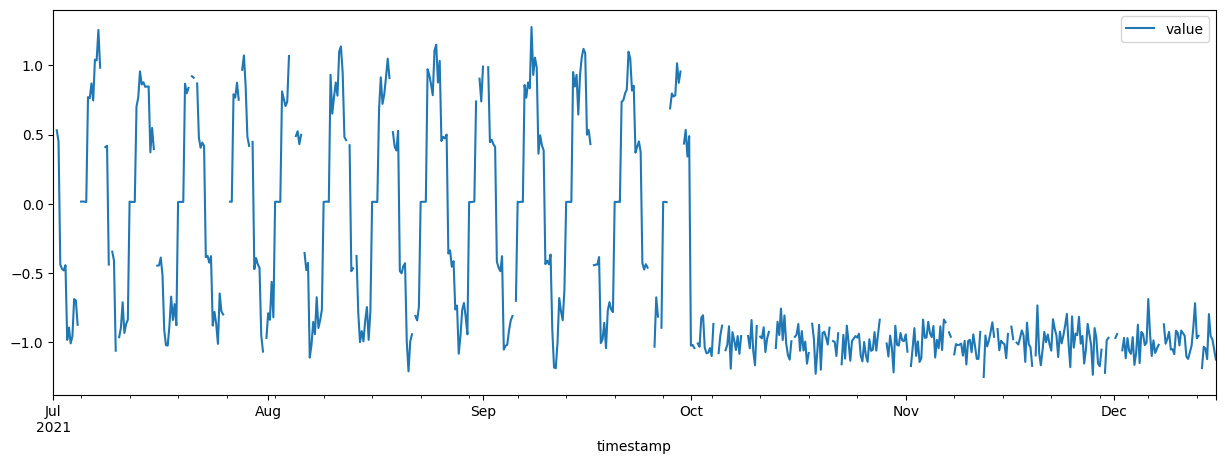

In [ ]:
dataset.plot(figsize=(15, 5))
plt.show()

In [ ]:
pre_dataset: pd.DataFrame = preprocessing_pipeline.fit_transform(dataset)

In [ ]:
pre_dataset.head(10)

,value,seasonality_sin_0,seasonality_sin_1,seasonality_sin_2,seasonality_sin_3,seasonality_sin_4,seasonality_cos_0,seasonality_cos_1,seasonality_cos_2,seasonality_cos_3,seasonality_cos_4,trend,lag_1,lag_5,lag_9
timestamp,,,,,,,,,,,,,,,
2021-07-01 00:00:00,0.459726,-0.918569,-0.744960,0.284135,0.222812,0.878655,-0.395261,-0.667109,0.958784,0.974861,-0.477457,-0.178934,0.459726,0.459726,0.459726
2021-07-01 06:00:00,0.495199,0.484312,-0.948626,0.892999,0.998350,-0.808446,-0.874896,0.316399,0.450059,0.057423,0.588571,-0.178934,0.459726,0.459726,0.459726
2021-07-01 12:00:00,0.530672,0.174696,-0.195349,0.939705,-0.736945,0.724270,-0.984623,0.980734,-0.341987,-0.675953,-0.689517,-0.178934,0.495199,0.459726,0.459726
2021-07-01 18:00:00,0.448953,0.962474,0.754990,0.999995,-0.854408,-0.627582,0.271374,0.655736,0.003255,0.519603,0.778551,-0.178934,0.530672,0.459726,0.459726
2021-07-02 00:00:00,-0.439928,-0.365383,0.943720,0.687609,0.261169,0.520052,0.930857,-0.330747,-0.726082,0.965293,-0.854135,-0.178934,0.448953,0.459726,0.459726
2021-07-02 06:00:00,-0.472273,-0.044051,0.180455,-0.057639,0.999839,-0.403538,0.999029,-0.983583,-0.998337,0.017919,0.914963,-0.178934,-0.439928,0.459726,0.459726
2021-07-02 12:00:00,-0.483305,-0.989752,-0.764846,-0.766602,-0.763085,0.280052,-0.142799,-0.644213,-0.642123,-0.646298,-0.959985,-0.178934,-0.472273,0.495199,0.459726
2021-07-02 18:00:00,-0.445376,0.240143,-0.938596,-0.992976,-0.833203,-0.151729,-0.970738,0.345019,0.118319,0.552967,0.988422,-0.178934,-0.483305,0.530672,0.459726
2021-07-03 00:00:00,-0.985939,-0.087355,-0.165520,-0.594254,0.299117,0.020784,-0.996177,0.986206,0.804277,0.954216,-0.999784,-0.178934,-0.445376,0.448953,0.459726


# Experiment with different Models


In [ ]:
X = pre_dataset.drop(columns=["value"])
y = pre_dataset["value"]

## Linear Regression

In [ ]:
lr = LinearRegression()

lr_scores = pd.Series(
    -cross_val_score(
        lr,
        X,
        y,
        scoring="neg_mean_squared_error",
        cv=TimeSeriesSplit(n_splits=10),
    )
)

In [ ]:
lr_scores.describe()

count    10.000000
mean      0.073487
std       0.057644
min       0.016469
25%       0.028704
50%       0.072945
75%       0.089712
max       0.210151
dtype: float64

## Logistic Regression

In [ ]:
# Creating the polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

polyr = LinearRegression()

polyr_scores = pd.Series(
    -cross_val_score(
        polyr,
        X_poly,
        y,
        scoring="neg_mean_squared_error",
        cv=TimeSeriesSplit(n_splits=10),
    )
)

In [ ]:
polyr_scores.describe()

count    10.000000
mean      0.224336
std       0.378495
min       0.018957
25%       0.051562
50%       0.095257
75%       0.175429
max       1.282170
dtype: float64

## Support Vector Machine

In [ ]:
svr = SVR()

svr_scores = pd.Series(
    -cross_val_score(
        svr,
        X,
        y,
        scoring="neg_mean_squared_error",
        cv=TimeSeriesSplit(n_splits=10),
    )
)

In [ ]:
svr_scores.describe()

count    10.000000
mean      0.087449
std       0.081200
min       0.017956
25%       0.035500
50%       0.071560
75%       0.100421
max       0.298458
dtype: float64

## Decision Tree

In [ ]:
dt = DecisionTreeRegressor()

dt_scores = pd.Series(
    -cross_val_score(
        dt,
        X,
        y,
        scoring="neg_mean_squared_error",
        cv=TimeSeriesSplit(n_splits=10),
    )
)

In [ ]:
dt_scores.describe()

count    10.000000
mean      0.156544
std       0.240232
min       0.021869
25%       0.060482
50%       0.092163
75%       0.117699
max       0.832887
dtype: float64

## Random Forest

In [ ]:
rf = RandomForestRegressor()

rf_scores = pd.Series(
    -cross_val_score(
        rf,
        X,
        y,
        scoring="neg_mean_squared_error",
        cv=TimeSeriesSplit(n_splits=10),
    )
)

In [ ]:
rf_scores.describe()

count    10.000000
mean      0.055821
std       0.044172
min       0.010147
25%       0.021118
50%       0.051528
75%       0.066594
max       0.160224
dtype: float64

## Neural Networks MLPRegressor

In [ ]:
nn = MLPRegressor()

nn_scores = pd.Series(
    -cross_val_score(
        nn,
        X,
        y,
        scoring="neg_mean_squared_error",
        cv=TimeSeriesSplit(n_splits=10),
    )
)

In [ ]:
nn_scores.describe()

count    10.000000
mean      0.092710
std       0.082326
min       0.029185
25%       0.042522
50%       0.075265
75%       0.094546
max       0.311422
dtype: float64

## XGBoost Regressor

In [ ]:
xgb = XGBRegressor()
xgb_scores = pd.Series(
    -cross_val_score(
        xgb,
        X,
        y,
        scoring="neg_mean_squared_error",
        cv=TimeSeriesSplit(n_splits=10),
    )
)

In [ ]:
xgb_scores.describe()

count    10.000000
mean      0.091895
std       0.110544
min       0.012404
25%       0.035708
50%       0.065537
75%       0.093156
max       0.394128
dtype: float64

## LSTM

In [ ]:
X_lstm = X.to_numpy().reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
# Define a function to create model
def create_model():
    # define model
    model = Sequential()
    model.add(LSTM(50, activation="relu", input_shape=(1, X.shape[1])))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")
    return model


# Create a KerasClassifier instance
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# Now you can use cross_val_score
lstm_scores = pd.Series(
    -cross_val_score(
        model,
        X_lstm,
        y,
        scoring="neg_mean_squared_error",
        cv=TimeSeriesSplit(n_splits=10),
    )
)

2023-11-12 23:44:46.537688: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 23:44:46.588416: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 23:44:46.588521: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 23:44:46.591838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 23:44:46.591910: I tensorflow/compile

# Compare the models

In [ ]:
# Combine all the scores in a single DataFrame
scores = pd.DataFrame(
    {
        "Linear Regression": lr_scores.describe(),
        "Polynomial Regression": polyr_scores.describe(),
        "Support Vector Regression": svr_scores.describe(),
        "Decision Tree": dt_scores.describe(),
        "Random Forest": rf_scores.describe(),
        "Neural Network": nn_scores.describe(),
        "XGBoost": xgb_scores.describe(),
        "LSTM": lstm_scores.describe(),
    },
    index=lr_scores.describe().index,
)

In [ ]:
scores

,Linear Regression,Polynomial Regression,Support Vector Regression,Decision Tree,Random Forest,Neural Network,XGBoost,LSTM
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.073487,0.224336,0.087449,0.160443,0.056352,0.086446,0.091895,0.079146
std,0.057644,0.378495,0.081200,0.235805,0.042656,0.053859,0.110544,0.053896
min,0.016469,0.018957,0.017956,0.022190,0.010172,0.027267,0.012404,0.026081
25%,0.028704,0.051562,0.035500,0.061304,0.021586,0.045348,0.035708,0.041970
50%,0.072945,0.095257,0.071560,0.103812,0.052834,0.087763,0.065537,0.076785
75%,0.089712,0.175429,0.100421,0.123197,0.069803,0.103395,0.093156,0.089504
max,0.210151,1.282170,0.298458,0.822482,0.153144,0.208156,0.394128,0.214533


It seems like that the most promising models are linear regression, random forest, Neural Network, LSTM, and XGBoost.
But Linear Regression is the simplest model and fastest to train. So, we will use Linear Regression as our final model.

# Creating Models

In [ ]:
datasets_names = [path.split("/")[-1].split(".")[0] for path in datasets_paths]

In [ ]:
for (i, dataset), dataset_name in zip(enumerate(datasets), datasets_names):
    pre_dataset = preprocessing_pipeline.fit_transform(dataset)

    X = pre_dataset.drop(columns=["value"])
    y = pre_dataset["value"]

    lr = LinearRegression()
    lr.fit(X, y)
    with open(f"./pipelines/models/{dataset_name}.pkl", "wb") as file:
        pickle.dump(lr, file)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
